In [ ]:
#from google.colab import files

#uploaded = files.upload()

import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
supplies = pd.read_csv("https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/ff93b96c411085ae226f8db71052950c64039258/supplies.csv")
temperatures = pd.read_csv("https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/ff93b96c411085ae226f8db71052950c64039258/temperature.csv")
fires = pd.read_csv("https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/ff93b96c411085ae226f8db71052950c64039258/fires.csv")

In [ ]:
df_list = [supplies, temperatures, fires]
for df in df_list:
    display(df.head())
    print()

,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад
0,2019-01-02,E5,1,2019-02-08,11984.1925,11984.1925,3
1,2019-01-02,A1,34,2019-02-12,3913.8250,3913.8250,3
2,2019-01-02,A1,37,2019-02-23,11626.9120,11626.9120,3
3,2019-01-02,A1,44,2019-01-04,184.7815,184.7815,4
4,2019-01-02,C3,22,2019-02-07,9520.3315,9520.3315,3


,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена
0,3,43,A1,36.2,3045-3075,2020-08-05,219.0
1,4,39,A1,109.4,4025-4047,2020-08-05,219.0
2,4,23,A1,38.6,4048-4052,2020-08-05,219.0
3,4,46,A1,37.3,4057-4077,2020-08-05,219.0
4,4,12,A1,36.4,4091-4112,2020-08-05,219.0


,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель
0,2019-03-19,A1,255.00,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6
1,2019-03-24,B2,42.50,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21
2,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21
3,2019-06-11,A1,127.50,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15
4,2019-07-07,A1,127.50,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22


Дескрайб, пропуски, дубликаты.

In [ ]:
for df in df_list:
    # Сводная статистика
    print(df.describe())
    print()

    # Доля пропусков
    print(df.isna().mean())
    print()

    # Полные дубликаты
    print(f"Полные дубликаты: {df.duplicated().sum()}")
    print()

           Штабель   На склад, тн   На судно, тн        Склад
count  6323.000000    6323.000000    6321.000000  6323.000000
mean     27.192788    9892.676121    9879.046767     3.563656
std      15.604096   12689.089027   12681.216619     0.629237
min       1.000000     149.804000       0.119000     3.000000
25%      13.000000     736.992500     720.443000     3.000000
50%      28.000000    5474.994500    5436.676500     4.000000
75%      41.000000   13713.067000   13705.323500     4.000000
max      62.000000  120700.170000  120700.170000     6.000000

ВыгрузкаНаСклад    0.000000
Наим. ЕТСНГ        0.000000
Штабель            0.000000
ПогрузкаНаСудно    0.000000
На склад, тн       0.000000
На судно, тн       0.000316
Склад              0.000000
dtype: float64

Полные дубликаты: 18

             Склад      Штабель  Максимальная температура        Смена
count  4106.000000  4106.000000               4106.000000  3949.000000
mean      4.276912    22.905017                 44.563809   602.9

На разных складах могут быть штабели с одинаковым номером. Для каждой комбинации Склад-Штабель нужно создать уникальный идентификатор.

In [ ]:
for df in [supplies, temperatures, fires]:
    df['stack_id'] = (
        df['Склад'].astype(str) +
        df['Штабель'].astype(str).str.zfill(2)
    )
    print(df[['Склад', 'Штабель', 'stack_id']].head())
    print()

   Склад  Штабель stack_id
0      3        1      301
1      3       34      334
2      3       37      337
3      4       44      444
4      3       22      322

   Склад  Штабель stack_id
0      3       43      343
1      4       39      439
2      4       23      423
3      4       46      446
4      4       12      412

   Склад  Штабель stack_id
0      4        6      406
1      3       21      321
2      3       21      321
3      4       15      415
4      4       22      422



Замеры температур есть за период менее года.

In [ ]:
print(temperatures['Дата акта'].min())
print(temperatures['Дата акта'].max())
pd.to_datetime(temperatures['Дата акта'].max()) - pd.to_datetime(temperatures['Дата акта'].min())

2019-11-23
2020-09-30


Timedelta('312 days 00:00:00')

Данные о пожарах за 2.5 года.

In [ ]:
print(fires['Дата начала'].min())
print(fires['Дата начала'].max())
pd.to_datetime(fires['Дата начала'].max()) - pd.to_datetime(fires['Дата начала'].min())

2018-03-24 21:00:00
2020-09-30 09:00:00


Timedelta('920 days 12:00:00')

Распределение загоревшихся штабелей по складам.

In [ ]:
fires['year'] = pd.to_datetime(fires['Дата начала']).dt.year
fires.groupby(['Склад', 'year'])['Штабель'].count().unstack()

year,2018,2019,2020
Склад,,,
3,1.0,73.0,28.0
4,NaN,107.0,78.0
6,NaN,NaN,199.0


Распределение отгрузок по складам.

In [ ]:
supplies['year'] = pd.to_datetime(supplies['ВыгрузкаНаСклад']).dt.year
supplies.groupby(['Склад', 'year'])['Штабель'].count().unstack()

year,2019,2020
Склад,,
3,1741.0,1334.0
4,1709.0,1381.0
6,NaN,158.0


Выясним сколько замеров по одному штабелю может быть в день.

In [ ]:
temperatures.groupby(['stack_id', 'Дата акта']).size().reset_index(name='measurement_count').sort_values(by='measurement_count', ascending=False)

,stack_id,Дата акта,measurement_count
1284,430,2020-06-01,7
1676,601,2020-06-01,6
1665,601,2020-05-21,6
1666,601,2020-05-22,6
1706,601,2020-07-01,6
...,...,...,...
1573,447,2020-02-14,1
1571,447,2020-02-05,1
1570,447,2020-02-04,1
2176,651,2020-08-01,1


В день по одному штабелю может быть до 7 замеров.

In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
temperatures.query('stack_id == "430" and `Дата акта` == "2020-06-01"')

,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена,stack_id
1157,4,30,A1,28.3,4063-4078,2020-06-01,219.0,430
1171,4,30,A1,34.6,4063-4078,2020-06-01,NaN,430
1175,4,30,A1,28.5,4010-4014,2020-06-01,NaN,430
1183,4,30,A1,34.6,4063-4078,2020-06-01,NaN,430
1187,4,30,A1,28.5,4010-4014,2020-06-01,NaN,430
1197,4,30,A1,34.6,4063-4078,2020-06-01,921.0,430
1201,4,30,A1,28.5,4010-4014,2020-06-01,921.0,430


<Axes: ylabel='Frequency'>

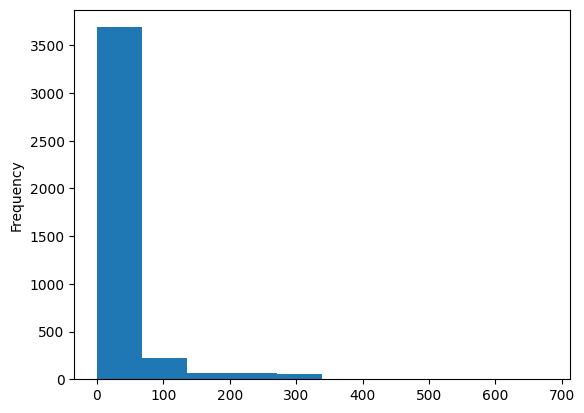

In [ ]:
temperatures['Максимальная температура'].plot.hist()

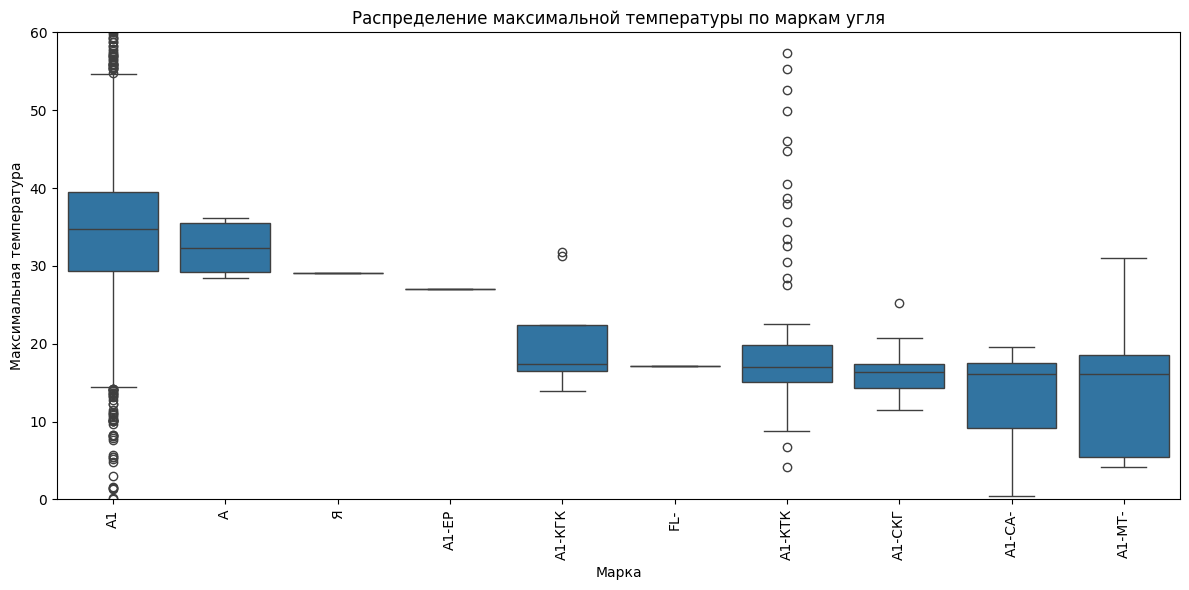

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=temperatures[
        temperatures['Марка'].notna() &
        temperatures['Марка'].astype(str).str.strip().str.lower().ne('nan') &
        temperatures['Марка'].isin(
            temperatures[
                temperatures['Марка'].notna() &
                temperatures['Марка'].astype(str).str.strip().str.lower().ne('nan')
            ]
            .groupby('Марка')['Максимальная температура']
            .median()
            .sort_values(ascending=False)
            .head(10)
            .index
        )
    ],
    x="Марка",
    y="Максимальная температура",
    order=(
        temperatures[
            temperatures['Марка'].notna() &
            temperatures['Марка'].astype(str).str.strip().str.lower().ne('nan')
        ]
        .groupby('Марка')['Максимальная температура']
        .median()
        .sort_values(ascending=False)
        .head(10)
        .index
    )
)
plt.xticks(rotation=90)
plt.ylim(0, 60)
plt.title("Распределение максимальной температуры по маркам угля")
plt.tight_layout()
plt.show()

In [ ]:
fires['Груз'].unique()

array(['A1', 'B2', 'E5'], dtype=object)

In [ ]:
temperatures.query('Марка == "A1"')['stack_id'].unique()

array(['343', '439', '423', '446', '412', '645', '601', '610', '605',
       '604', '321', '310', '406', '416', '447', '350', '336', '320',
       '312', '441', '430', '421', '307', '325', '332', '408', '309',
       '326', '334', '414', '300', '348', '355', '407', '444', '402',
       '440', '409', '338', '341', '316', '424', '356', '435', '313',
       '347', '651', '358', '353', '460', '362', '450', '333', '403',
       '319', '626', '305', '315', '327', '302', '438'], dtype=object)

In [ ]:
temperatures.groupby('stack_id')['Марка'].nunique().sort_values(ascending=False)

,Марка
stack_id,
307,4
421,4
439,4
336,4
312,3
...,...
460,1
610,1
626,1


In [ ]:
temperatures.query('stack_id == "321"')

,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена,stack_id
303,3,21,A1,16.9,NaN,2019-12-12,921.0,321
311,3,21,A1,10.1,NaN,2019-12-13,219.0,321
319,3,21,A1,13.7,NaN,2019-12-13,921.0,321
328,3,21,A1,10.8,NaN,2019-12-14,219.0,321
337,3,21,A1-СТР-,11.9,NaN,2019-12-14,921.0,321
347,3,21,A1-СТР-,13.7,NaN,2019-12-15,219.0,321
357,3,21,A1-СТР-,12.0,NaN,2019-12-15,921.0,321
368,3,21,A1-СТР-,14.8,NaN,2019-12-16,219.0,321


In [ ]:
supplies.query('stack_id == "307" & ВыгрузкаНаСклад < "2020-05-15"')

,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад,stack_id,year
2157,2019-08-15,A1,7,2019-09-04,43142.1665,43142.1665,3,307,2019
2164,2019-08-16,A1,7,2019-09-04,5804.1060,5804.1060,3,307,2019
2169,2019-08-17,A1,7,2019-09-04,24625.4095,24625.4095,3,307,2019
2242,2019-08-27,A1,7,2019-09-13,10867.4880,10867.4880,3,307,2019
2283,2019-08-31,A1,7,2019-09-13,11744.2715,11744.2715,3,307,2019
2292,2019-09-01,A1,7,2019-09-09,2368.9330,2368.9330,3,307,2019
2293,2019-09-01,A1,7,2019-09-13,199.6055,199.6055,3,307,2019
2967,2019-11-08,A1,7,2019-11-10,3720.6285,3720.6285,3,307,2019
2976,2019-11-09,A1,7,2019-12-11,1287.8775,1287.8775,3,307,2019
2990,2019-11-10,A1,7,2019-12-11,1482.2725,1482.2725,3,307,2019


In [ ]:
fires.query('`Дата составления` == "2019-03-24" and stack_id == "321"')

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year
1,2019-03-24,B2,42.5,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21,321,2019


In [ ]:
fires.query('`Дата составления` == "2019-03-25" and stack_id == "321"')

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year
2,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21,321,2018


Корректировна даных, для дальнейшей работы с ними

In [ ]:
# объединение таблиц погоды в одну
url_2015 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2015.csv"
weather_data_2015 = pd.read_csv(url_2015)
weather_data_2015.head()

url_2016 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2016.csv"
weather_data_2016 = pd.read_csv(url_2016)
weather_data_2016.head()

url_2017 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2017.csv"
weather_data_2017 = pd.read_csv(url_2017)
weather_data_2017.head()

url_2018 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2018.csv"
weather_data_2018 = pd.read_csv(url_2018)
weather_data_2018.head()

url_2019 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2019.csv"
weather_data_2019 = pd.read_csv(url_2019)
weather_data_2019.head()

url_2020 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2020.csv"
weather_data_2020 = pd.read_csv(url_2020)
weather_data_2020.head()

url_2021 = "https://raw.githubusercontent.com/TatianaZhandarova/-coal_project/main/weather_data_2021.csv"
weather_data_2021 = pd.read_csv(url_2021)
weather_data_2021.head()


all_weather = pd.concat([
    weather_data_2015,
    weather_data_2016,
    weather_data_2017,
    weather_data_2018,
    weather_data_2019,
    weather_data_2020,
    weather_data_2021
], ignore_index=True)

all_weather.head()

,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
0,2015-01-01 00:00:00,-2.1,1026.6,75,0.0,41,34.2,54.0,98,NaN,3
1,2015-01-01 01:00:00,-2.1,1025.9,73,0.0,40,32.2,52.2,99,NaN,3
2,2015-01-01 02:00:00,-2.2,1026.1,75,0.0,36,32.2,50.4,99,NaN,3
3,2015-01-01 03:00:00,-2.2,1025.8,75,0.0,34,33.2,51.5,97,NaN,3
4,2015-01-01 04:00:00,-2.3,1025.9,76,0.0,33,33.5,52.6,100,NaN,3


In [ ]:
# проверка наличия дублей
supplies.duplicated().sum()
temperatures.duplicated().sum()
fires.duplicated().sum()
all_weather.duplicated().sum()

np.int64(24)

In [ ]:
# просмотр дублей
supplies[supplies.duplicated(keep=False)].sort_values(by=supplies.columns.tolist())
temperatures[temperatures.duplicated(keep=False)].sort_values(by=temperatures.columns.tolist())
fires[fires.duplicated(keep=False)].sort_values(by=fires.columns.tolist())
all_weather[all_weather.duplicated(keep=False)].sort_values(by=all_weather.columns.tolist())

,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
27696,2018-03-01 00:00:00,8.3,1003.3,87,4.2,236,40.2,45.7,100,NaN,63
27697,2018-03-01 00:00:00,8.3,1003.3,87,4.2,236,40.2,45.7,100,NaN,63
27698,2018-03-01 01:00:00,7.6,1003.4,85,1.6,224,37.7,54.7,100,NaN,61
27699,2018-03-01 01:00:00,7.6,1003.4,85,1.6,224,37.7,54.7,100,NaN,61
27700,2018-03-01 02:00:00,7.5,1003.8,80,0.0,206,39.8,51.1,99,NaN,3
27701,2018-03-01 02:00:00,7.5,1003.8,80,0.0,206,39.8,51.1,99,NaN,3
27702,2018-03-01 03:00:00,5.9,1005.5,87,0.0,219,53.0,70.9,100,NaN,3
27703,2018-03-01 03:00:00,5.9,1005.5,87,0.0,219,53.0,70.9,100,NaN,3
27704,2018-03-01 04:00:00,4.6,1005.7,78,0.0,223,53.3,74.9,100,NaN,3
27705,2018-03-01 04:00:00,4.6,1005.7,78,0.0,223,53.3,74.9,100,NaN,3


In [ ]:
# удаление дублей с оставлением первого вхождения
supplies.drop_duplicates(keep='first', inplace=True)
temperatures.drop_duplicates(keep='first', inplace=True)
fires.drop_duplicates(keep='first', inplace=True)
all_weather.drop_duplicates(keep='first', inplace=True)

In [ ]:
print(supplies.info(), temperatures.info(), fires.info(), all_weather.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6322
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ВыгрузкаНаСклад  6305 non-null   object 
 1   Наим. ЕТСНГ      6305 non-null   object 
 2   Штабель          6305 non-null   int64  
 3   ПогрузкаНаСудно  6305 non-null   object 
 4   На склад, тн     6305 non-null   float64
 5   На судно, тн     6303 non-null   float64
 6   Склад            6305 non-null   int64  
 7   stack_id         6305 non-null   object 
 8   year             6305 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 467.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 4105
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Склад                     4031 non-null   int64  
 1   Штабель                   4031 non-null   int64 

In [ ]:
print(supplies.columns)
print(temperatures.columns)
print(fires.columns)
print(all_weather.columns)

Index(['ВыгрузкаНаСклад', 'Наим. ЕТСНГ', 'Штабель', 'ПогрузкаНаСудно',
       'На склад, тн', 'На судно, тн', 'Склад', 'stack_id', 'year'],
      dtype='object')
Index(['Склад', 'Штабель', 'Марка', 'Максимальная температура', 'Пикет',
       'Дата акта', 'Смена', 'stack_id'],
      dtype='object')
Index(['Дата составления', 'Груз', 'Вес по акту, тн', 'Склад', 'Дата начала',
       'Дата оконч.', 'Нач.форм.штабеля', 'Штабель', 'stack_id', 'year'],
      dtype='object')
Index(['date', 't', 'p', 'humidity', 'precipitation', 'wind_dir', 'v_avg',
       'v_max', 'cloudcover', 'visibility', 'weather_code'],
      dtype='object')


In [ ]:
# корректировка типов данных
fires = fires.astype({'Дата составления' : 'datetime64[ms]',
                      'Дата начала' : 'datetime64[ms]',
                      'Дата оконч.' : 'datetime64[ms]',
                      'Нач.форм.штабеля' : 'datetime64[ms]'})

supplies = supplies.astype({'ВыгрузкаНаСклад' : 'datetime64[ms]',
                      'ПогрузкаНаСудно' : 'datetime64[ms]'})

temperatures = temperatures.astype({'Дата акта' : 'datetime64[ms]'})

all_weather = all_weather.astype({'date' : 'datetime64[ms]'})

In [ ]:
print(supplies.info(), temperatures.info(), fires.info(), all_weather.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6322
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ВыгрузкаНаСклад  6305 non-null   datetime64[ms]
 1   Наим. ЕТСНГ      6305 non-null   object        
 2   Штабель          6305 non-null   int64         
 3   ПогрузкаНаСудно  6305 non-null   datetime64[ms]
 4   На склад, тн     6305 non-null   float64       
 5   На судно, тн     6303 non-null   float64       
 6   Склад            6305 non-null   int64         
 7   stack_id         6305 non-null   object        
 8   year             6305 non-null   int32         
dtypes: datetime64[ms](2), float64(2), int32(1), int64(2), object(2)
memory usage: 467.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 4105
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----        

Исследование данных для поиска закономерностей и выявление аномалий:

Исходя из того, что weather_code - идентификатор погоды, присовоенный определенной совокупности (температуры, влажности, ветру и т.д.) факторов, наибольшее число пожаров произошло при weather_code 0.

In [ ]:
# анализ горящих марок угля и частоты его упоминания
display(fires['Груз'].value_counts(), supplies['Наим. ЕТСНГ'].value_counts(), temperatures['Марка'].value_counts())

,count
Груз,
A1,482
B2,2
E5,1


,count
Наим. ЕТСНГ,
A1,4267
E5,736
B2,606
C3,399
G7,177
K10,66
I9,25
F6,16
L11,13


,count
Марка,
A1,3614
A1-КТК,114
A1-СУЭК,70
A1-СА-ШУБ,51
A1-МТ-ШУБ,39
A1-КРУ,31
A1-СКГ,27
A1-СА-,22
A1-КГК,8


In [ ]:
# анализ погодных условий за предоставленный период с определенным кодом, дя выявление закономерностей между погодными условиями и возгоранием угля
per = [0.1, 0.5, 0.9]
all_weather.query('weather_code == 0').describe(percentiles=per)

,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
count,22582,22582.000000,22582.000000,22582.000000,22582.0,22582.000000,22582.000000,22582.000000,22582.000000,0.0,22582.0
mean,2018-07-25 20:34:20.650000,17.720729,1015.895293,72.241254,0.0,148.564653,18.487517,26.690523,3.987601,NaN,0.0
min,2015-01-01 20:00:00,-6.800000,996.900000,27.000000,0.0,1.000000,0.000000,0.700000,0.000000,NaN,0.0
10%,2015-09-06 11:06:00,6.800000,1008.500000,54.000000,0.0,23.000000,7.400000,11.900000,0.000000,NaN,0.0
50%,2018-08-05 07:30:00,19.800000,1015.100000,73.000000,0.0,112.000000,17.700000,25.200000,1.000000,NaN,0.0
90%,2021-05-10 10:54:00,26.200000,1024.700000,89.000000,0.0,322.000000,30.500000,43.600000,14.000000,NaN,0.0
max,2021-12-24 07:00:00,32.000000,1040.300000,100.000000,0.0,360.000000,53.700000,84.200000,19.000000,NaN,0.0
std,NaN,7.642107,6.310036,12.896840,0.0,114.735600,8.903614,12.511033,5.602445,NaN,0.0


In [ ]:
all_weather.query('weather_code == 2').describe(percentiles=per)

,date,t,p,humidity,precipitation,wind_dir,v_avg,v_max,cloudcover,visibility,weather_code
count,6232,6232.000000,6232.000000,6232.000000,6232.0,6232.000000,6232.000000,6232.000000,6232.000000,0.0,6232.0
mean,2018-05-03 14:21:32.811000,12.648171,1016.449117,76.693357,0.0,174.300225,20.068710,29.603306,64.802150,NaN,2.0
min,2015-01-01 14:00:00,-7.100000,993.600000,36.000000,0.0,1.000000,0.400000,3.200000,50.000000,NaN,2.0
10%,2015-08-21 02:30:00,3.200000,1007.800000,60.000000,0.0,34.000000,8.700000,14.400000,52.000000,NaN,2.0
50%,2018-04-01 03:00:00,11.700000,1016.000000,78.000000,0.0,187.000000,19.200000,28.100000,65.000000,NaN,2.0
90%,2021-03-15 19:24:00,23.700000,1026.100000,90.000000,0.0,327.000000,32.700000,47.200000,77.000000,NaN,2.0
max,2021-12-26 00:00:00,30.400000,1038.600000,100.000000,0.0,360.000000,58.300000,89.300000,79.000000,NaN,2.0
std,NaN,7.700922,7.093400,11.486380,0.0,106.904727,9.278315,12.861566,8.863966,NaN,0.0


In [ ]:
# Датасет fires дополняем данными о погоде, которая была во время начала пожара

fires = pd.merge_asof(
    fires.sort_values('Дата начала'),
    all_weather[['date', 't', 'humidity', 'precipitation', 'v_avg']].sort_values('date'),
    left_on='Дата начала',
    right_on='date',
    direction='backward'
).drop(columns=['date'])

In [ ]:
fires.head()

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year,t,humidity,precipitation,v_avg
0,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21,321,2018,4.5,78,0.0,22.0
1,2019-03-19,A1,255.00,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6,406,2019,6.8,84,0.0,18.4
2,2019-03-24,B2,42.50,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21,321,2019,4.1,77,0.0,24.0
3,2019-06-11,A1,127.50,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15,415,2019,25.0,57,0.0,23.1
4,2019-07-07,A1,127.50,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22,422,2019,23.6,74,0.0,19.7


In [ ]:
fires['Вес по акту, тн'].describe()

,"Вес по акту, тн"
count,485.000000
mean,210.456495
std,647.555972
min,2.550000
25%,21.250000
50%,80.750000
75%,212.500000
max,12750.000000


In [ ]:
fires['weight_category'] = pd.qcut(fires['Вес по акту, тн'], q=4, labels=['A', 'B', 'C', 'D'])

In [ ]:
fires.query('Склад == 6')['weight_category'].value_counts()

,count
weight_category,
A,77
B,66
C,47
D,8


In [ ]:
fires.query('weight_category == "A"')['Вес по акту, тн'].describe()

,"Вес по акту, тн"
count,130.000000
mean,12.514615
std,5.391493
min,2.550000
25%,7.862500
50%,12.750000
75%,17.000000
max,21.250000


In [ ]:
supplies.groupby('Склад')['stack_id'].count()

,stack_id
Склад,
3,3069
4,3078
6,158


In [ ]:
supplies.query('Склад == 6').sample(10)

,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад,stack_id,year
5301,2020-06-24,A1,4,2020-07-07,7922.7055,7922.7055,6,604,2020
5342,2020-06-29,A1,4,2020-07-12,552.7465,552.7465,6,604,2020
6257,2020-09-21,A1,5,2020-10-08,12268.0415,12268.0415,6,605,2020
5853,2020-08-13,A1,1,2020-08-29,10422.8870,10371.2155,6,601,2020
6006,2020-08-25,E5,1,2020-09-18,556.7500,556.7500,6,601,2020
4387,2020-04-07,A1,1,2020-05-31,26535.0535,26514.5600,6,601,2020
4933,2020-05-23,A1,4,2020-06-04,368.5005,368.5005,6,604,2020
6185,2020-09-11,C3,5,2020-09-28,11878.1805,11878.1805,6,605,2020
6013,2020-08-25,A1,1,2020-09-28,12616.5160,12616.5160,6,601,2020
6073,2020-08-31,A1,45,2020-10-13,557.0220,557.0220,6,645,2020


In [ ]:
temperatures.pivot_table(
    index='Склад',
    values='Максимальная температура',
    aggfunc=['min', 'max', 'median']
)

,min,max,median
,Максимальная температура,Максимальная температура,Максимальная температура
Склад,,,
3,0.6,354.0,31.4
4,0.0,411.0,32.8
6,9.7,679.0,38.8


In [ ]:
temperatures[temperatures["Максимальная температура"] > 100]

,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена,stack_id
1,4,39,A1,109.4,4025-4047,2020-08-05,219.0,439
9,6,1,A1,190.0,6063-6081,2020-08-05,219.0,601
10,6,4,A1,243.1,6082-6094,2020-08-05,219.0,604
370,3,36,A1-МТ-ШУБ,123.0,NaN,2019-12-16,219.0,336
808,4,6,A1,411.0,4116-4120,2020-05-18,921.0,406
...,...,...,...,...,...,...,...,...
4012,3,33,A1,150.0,3048-3092,2020-09-27,921.0,333
4022,6,1,A1,150.0,6035-6053,2020-09-27,921.0,601
4026,3,33,A1,118.8,3048-3092,2020-09-28,219.0,333
4036,6,1,A1,150.0,6035-6053,2020-09-28,219.0,601


In [ ]:
temperatures.query('stack_id == "439" & `Дата акта` == "2020-06-23"').sort_values('Дата акта')

/tmp/ipython-input-3435823470.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ms] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  temperatures.query('stack_id == "439" & `Дата акта` == "2020-06-23"').sort_values('Дата акта')


,Склад,Штабель,Марка,Максимальная температура,Пикет,Дата акта,Смена,stack_id
1691,4,39,A1,25.8,4016-4046,2020-06-23,219.0,439
1702,4,39,A1,79.2,4011-4048,2020-06-23,921.0,439


In [ ]:
fires.query('stack_id == "439"').sort_values('Дата начала')

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year,t,humidity,precipitation,v_avg,weight_category
220,2020-06-20,A1,68.00,4,2020-06-20 09:00:00,2020-06-20 21:00:00,2020-01-12 00:00:00,39,439,2020,20.9,89,0.0,13.4,B
227,2020-06-24,A1,68.00,4,2020-06-23 21:00:00,2020-06-24 09:00:00,2020-01-12 00:00:00,39,439,2020,24.9,76,0.0,18.8,B
229,2020-06-24,A1,102.00,4,2020-06-24 09:01:00,2020-06-24 20:59:00,2020-01-12 00:00:00,39,439,2020,24.9,82,0.0,9.5,C
232,2020-06-25,A1,144.50,4,2020-06-24 21:00:00,2020-06-25 09:00:00,2020-01-12 00:00:00,39,439,2020,24.2,84,0.0,15.5,C
235,2020-06-26,A1,102.00,4,2020-06-25 21:01:00,2020-06-26 09:00:00,2020-01-12 00:00:00,39,439,2020,24.3,58,0.0,26.5,C
245,2020-06-29,A1,127.50,4,2020-06-29 21:00:00,2020-06-30 09:00:00,2020-01-12 00:00:00,39,439,2020,23.4,79,0.0,16.9,C
253,2020-07-02,A1,42.50,4,2020-07-01 21:00:00,2020-07-02 21:00:00,2020-01-12 00:00:00,39,439,2020,23.7,91,0.0,10.7,B
266,2020-07-06,A1,144.50,4,2020-07-06 09:00:00,2020-07-06 21:00:00,2020-01-12 00:00:00,39,439,2020,26.0,88,0.0,5.5,C
270,2020-07-08,A1,127.50,4,2020-07-07 21:00:00,2020-07-08 09:00:00,2020-01-12 00:00:00,39,439,2020,26.3,92,0.0,7.7,C
274,2020-07-09,A1,51.00,4,2020-07-08 21:00:00,2020-07-09 09:00:00,2020-01-12 00:00:00,39,439,2020,24.4,72,0.0,34.9,B


In [ ]:
supplies.query('stack_id == "439" & `ВыгрузкаНаСклад` == "2020-06-20"')

/tmp/ipython-input-871397447.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ms] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  supplies.query('stack_id == "439" & `ВыгрузкаНаСклад` == "2020-06-20"')


,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад,stack_id,year
5264,2020-06-20,A1,39,2020-07-24,27142.013,27142.013,4,439,2020


- Больше всего пожаров произошло на складе №6.
- Наименьшее число отгрузок производится со склада №6.
- На складе №6 чаще возгораются штабели весом до 212тн.
- Возгорание наиболее вероятно при резком увеличении температуры штабеля.

In [ ]:
supplies.query('stack_id == "601"')

,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад,stack_id,year
4114,2020-03-15,E5,1,2020-04-27,198.9340,198.9340,6,601,2020
4121,2020-03-15,A1,1,2020-04-27,24447.1645,24447.1645,6,601,2020
4306,2020-03-30,A1,1,2020-05-28,38770.7950,38770.7950,6,601,2020
4307,2020-03-30,A1,1,2020-05-01,803.2160,803.2160,6,601,2020
4347,2020-04-03,A1,1,2020-05-28,87420.8000,87420.8000,6,601,2020
...,...,...,...,...,...,...,...,...,...
6021,2020-08-26,A1,1,2020-09-18,186.9235,186.9235,6,601,2020
6072,2020-08-31,A1,1,2020-08-31,24595.0985,24595.0985,6,601,2020
6181,2020-09-11,A1,1,2020-10-02,32208.0555,32208.0555,6,601,2020
6193,2020-09-12,A1,1,2020-10-02,4533.0585,4533.0585,6,601,2020


In [ ]:
fires.head()

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year,t,humidity,precipitation,v_avg,weight_category
0,2019-03-25,B2,72.25,3,2018-03-24 21:00:00,2019-03-25 09:00:00,2019-01-03 00:00:00,21,321,2018,4.5,78,0.0,22.0,B
1,2019-03-19,A1,255.00,4,2019-03-19 09:00:00,2019-03-19 21:00:00,2018-11-23 00:00:00,6,406,2019,6.8,84,0.0,18.4,D
2,2019-03-24,B2,42.50,3,2019-03-24 09:00:00,2019-03-24 21:00:00,2019-01-03 00:00:00,21,321,2019,4.1,77,0.0,24.0,B
3,2019-06-11,A1,127.50,4,2019-06-11 09:00:00,2019-06-11 21:00:00,2019-04-28 23:55:00,15,415,2019,25.0,57,0.0,23.1,C
4,2019-07-07,A1,127.50,4,2019-07-06 21:00:00,2019-07-07 09:00:00,2019-05-19 00:00:00,22,422,2019,23.6,74,0.0,19.7,C


In [ ]:
# Исследуем сколько времени минимально должно пройти от формирования штабеля до пожара

(fires['Дата начала'] - fires['Нач.форм.штабеля']).dt.days.sort_values()

,0
0,-285
387,-4
402,6
406,7
407,8
...,...
394,220
81,247
30,360
378,630


In [ ]:
supplies.query('stack_id == "403"').sort_values('ВыгрузкаНаСклад')

,ВыгрузкаНаСклад,Наим. ЕТСНГ,Штабель,ПогрузкаНаСудно,"На склад, тн","На судно, тн",Склад,stack_id,year
2842,2019-10-27,E5,3,2019-11-03,7070.0875,7070.0875,4,403,2019
2852,2019-10-28,E5,3,2019-11-03,15133.7825,15133.7825,4,403,2019
2857,2019-10-28,A1,3,2019-11-07,10057.3275,10057.3275,4,403,2019
2858,2019-10-28,A1,3,2019-11-03,23209.3605,23209.3605,4,403,2019
2873,2019-10-29,A1,3,2019-11-03,23956.6380,23956.6380,4,403,2019
2874,2019-10-29,A1,3,2019-11-07,6860.4690,6860.4690,4,403,2019
2882,2019-10-30,E5,3,2019-11-07,199.7330,199.7330,4,403,2019
2887,2019-10-30,A1,3,2019-11-07,10233.5580,10233.5580,4,403,2019
2888,2019-10-30,A1,3,2019-11-03,1539.1460,1539.1460,4,403,2019
2902,2019-10-31,A1,3,2019-11-03,404.2770,404.2770,4,403,2019


In [ ]:
fires.query('stack_id == "403"')

,Дата составления,Груз,"Вес по акту, тн",Склад,Дата начала,Дата оконч.,Нач.форм.штабеля,Штабель,stack_id,year,t,humidity,precipitation,v_avg,weight_category
402,2020-08-23,A1,5.95,4,2020-08-23 09:00:00,2020-08-23 21:00:00,2020-08-17,3,403,2020,22.1,59,0.0,25.2,A
406,2020-08-24,A1,5.10,4,2020-08-24 21:00:00,2020-08-25 09:00:00,2020-08-17,3,403,2020,23.7,62,0.0,23.0,A
407,2020-08-25,A1,5.10,4,2020-08-25 09:00:00,2020-08-25 21:00:00,2020-08-17,3,403,2020,23.0,51,0.0,21.3,A
411,2020-08-29,A1,12.75,4,2020-08-28 21:00:00,2020-08-29 09:00:00,2020-08-17,3,403,2020,23.5,91,0.0,11.7,A
422,2020-09-04,A1,17.00,4,2020-09-04 16:25:00,2020-09-04 17:00:00,2020-08-17,3,403,2020,24.7,88,0.0,12.2,A
423,2020-09-05,A1,12.75,4,2020-09-04 21:00:00,2020-09-05 09:00:00,2020-08-17,3,403,2020,23.9,88,0.0,12.4,A
425,2020-09-05,A1,12.75,4,2020-09-05 09:00:00,2020-09-05 21:00:00,2020-08-17,3,403,2020,23.7,86,0.6,9.9,A
429,2020-09-06,A1,12.75,4,2020-09-06 09:00:00,2020-09-06 21:00:00,2020-08-17,3,403,2020,21.2,85,2.3,19.9,A
433,2020-09-08,A1,170.00,4,2020-09-08 21:00:00,2020-09-09 09:00:00,2020-08-17,3,403,2020,24.6,79,0.0,10.5,C
435,2020-09-09,A1,11.90,4,2020-09-09 09:00:00,2020-09-09 21:00:00,2020-08-17,3,403,2020,21.6,69,0.0,23.7,A


In [ ]:
# Распределение штабелей по складам

print(temperatures['stack_id'].nunique())

temperatures.groupby('Склад')['stack_id'].nunique()

69


,stack_id
Склад,
3,37
4,25
6,7


/tmp/ipython-input-1863591305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stacks_per_warehouse.index, y=stacks_per_warehouse.values, palette='viridis')


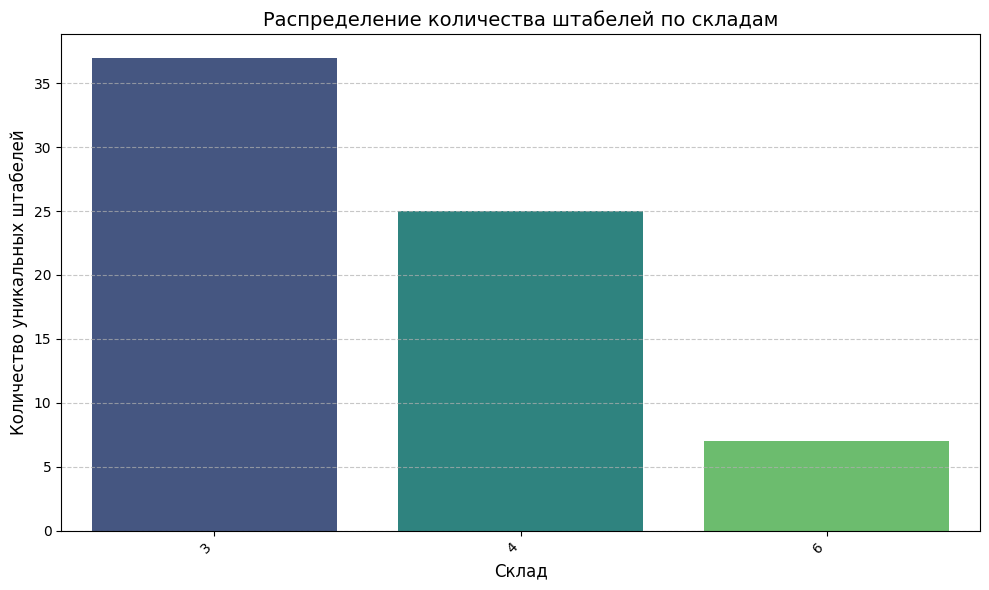

In [ ]:
# Подсчёт уникальных stack_id по складам
stacks_per_warehouse = temperatures.groupby('Склад')['stack_id'].nunique()

# Сортировка для лучшей читаемости (по убыванию)
stacks_per_warehouse = stacks_per_warehouse.sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=stacks_per_warehouse.index, y=stacks_per_warehouse.values, palette='viridis')
plt.title('Распределение количества штабелей по складам', fontsize=14)
plt.xlabel('Склад', fontsize=12)
plt.ylabel('Количество уникальных штабелей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from datetime import timedelta

def id_clean(series):
    return series.astype(str).str.replace(r'\.0$', '', regex=True).str.strip()

def date_clean(series):
    return pd.to_datetime(series, dayfirst=True, errors='coerce').dt.normalize()

extracted = 'ВыгрузкаНаСклад'
loaded = 'ПогрузкаНаСудно'
to_storage = 'На склад, тн'
to_ship = 'На судно, тн'
stack = 'stack_id'
stabel_name = 'Наим. ЕТСНГ'

act_date = 'Дата акта'
temporary_stack = 'stack_id'
max_temperature = 'Максимальная температура'

day_date = 'date'
day_temperature= 't'
hum = 'humidity'
wind = 'v_avg'
precip = 'precipitation'

fire_date = 'Дата начала'
fire_stack = 'stack_id'

group_df = supplies[[stack, stabel_name]].dropna().drop_duplicates()
group_df['clean_id'] = id_clean(group_df[stack])
rename_dict = dict(zip(group_df['clean_id'], group_df[stabel_name]))

df_in = supplies[[extracted, stack, to_storage]].copy()
df_in.columns = ['Дата', 'Stack', 'Change']
df_in['Дата'] = date_clean(df_in['Дата'])
df_in['Change'] = df_in['Change'].fillna(0)
df_in = df_in.dropna(subset=['Дата'])

df_out = supplies[[loaded, stack, to_ship]].copy()
df_out.columns = ['Дата', 'Stack', 'Change']
df_out['Дата'] = date_clean(df_out['Дата'])
df_out['Change'] = -df_out['Change'].fillna(0)
df_out = df_out.dropna(subset=['Дата'])

moves = pd.concat([df_in, df_out], ignore_index=True)
moves['Stack'] = id_clean(moves['Stack'])
moves['Дата'] = moves['Дата'].dt.normalize()

a = moves.groupby(['Дата', 'Stack'])['Change'].sum().reset_index().pivot(index='Дата', columns='Stack', values='Change').fillna(0)

full_dates = pd.date_range(a.index.min(), a.index.max(), freq='D')
a = a.reindex(full_dates, fill_value=0)

weights_stack = a.cumsum().stack().reset_index()

weights_stack.columns = ['Дата', 'Номер штабеля', 'Вес, тн']

df_temp = temperatures.copy()
df_temp['Дата'] = date_clean(df_temp[act_date])

stabels_df = df_temp.groupby(['Дата', temporary_stack])[max_temperature].max().reset_index()
stabels_df.rename(columns={temporary_stack: 'Номер штабеля', max_temperature: 'Макс. темп. штабеля'}, inplace=True)
stabels_df['Номер штабеля'] = id_clean(stabels_df['Номер штабеля'])

weather_df = all_weather.copy()
weather_df['Дата'] = date_clean(weather_df[day_date])

w_cols = [day_temperature, hum, wind, precip]
weather_day = weather_df.groupby('Дата')[w_cols].mean().reset_index()

weather_day.rename(columns={
    day_temperature: 't воздуха',
    hum: 'Влажность',
    wind: 'Скорость ветра',
    precip: 'Осадки'
}, inplace=True)

df_fires = fires.copy()
df_fires['dt'] = pd.to_datetime(df_fires[fire_date], dayfirst=True, errors='coerce')
df_fires = df_fires.dropna(subset=['dt'])

df_fires = df_fires.sort_values([fire_date, 'dt'])
df_fires['diff'] = df_fires.groupby(fire_stack)['dt'].diff()
fires_remove = df_fires[(df_fires['diff'] > pd.Timedelta(hours=2)) | (df_fires['diff'].isnull())].copy()
fires_remove['date_only'] = fires_remove['dt'].dt.normalize()
fires_remove['stack_id'] = id_clean(fires_remove[fire_stack])

def check_fire(row):
 d = row['Дата']
 s = row['Номер штабеля']

 end_date = d + timedelta(days=3)
 fires_info = (fires_remove['stack_id'] == s) & (fires_remove['date_only'] >= d) & (fires_remove['date_only'] <= end_date)
 if len(fires_remove[fires_info]) > 0:
  return 1
 else:
   return 0


final_df = pd.merge(stabels_df, weights_stack, on=['Дата', 'Номер штабеля'], how='left')
final_df['Вес, тн'] = final_df['Вес, тн'].fillna(method='ffill').fillna(0)
final_df = pd.merge(final_df, weather_day, on='Дата', how='left')
final_df['Пожар (3 дня)'] = final_df.apply(check_fire, axis=1)
final_df[act_date] = final_df['Номер штабеля'].map(rename_dict)
final_df[act_date] = final_df[act_date].fillna(final_df['Номер штабеля'])


dataset = ['Дата', act_date, 'Макс. темп. штабеля', 'Вес, тн',
't воздуха', 'Влажность', 'Скорость ветра', 'Осадки', 'Пожар (3 дня)']

final = [b for b in dataset if b in final_df.columns]


display(final_df.head(500))

print(f"Кол-во зафиксированных пожаров на одном штабеля 3 дня подряд (0 - не было, 1 - было): {final_df['Пожар (3 дня)'].rename("").value_counts()} ")

/tmp/ipython-input-906174984.py:101: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['Вес, тн'] = final_df['Вес, тн'].fillna(method='ffill').fillna(0)


,Дата,Номер штабеля,Макс. темп. штабеля,"Вес, тн",t воздуха,Влажность,Скорость ветра,Осадки,Пожар (3 дня),Дата акта
0,2019-11-23,307,19.2,20705.8555,2.254167,75.916667,38.029167,0.0,0,E5
1,2019-11-23,317,20.5,32158.8575,2.254167,75.916667,38.029167,0.0,0,A1
2,2019-11-23,331,18.3,261986.9150,2.254167,75.916667,38.029167,0.0,0,A1
3,2019-11-23,336,17.7,264238.0635,2.254167,75.916667,38.029167,0.0,0,E5
4,2019-11-23,409,22.6,66039.8915,2.254167,75.916667,38.029167,0.0,0,E5
...,...,...,...,...,...,...,...,...,...,...
495,2020-05-12,439,21.6,227022.7515,14.345833,80.500000,30.225000,0.0,0,A1
496,2020-05-12,447,20.6,272243.9925,14.345833,80.500000,30.225000,0.0,0,C3
497,2020-05-12,601,21.5,639135.9270,14.345833,80.500000,30.225000,0.0,0,A1
498,2020-05-12,604,23.4,135791.4950,14.345833,80.500000,30.225000,0.0,0,A1


Кол-во зафиксированных пожаров на одном штабеля 3 дня подряд (0 - не было, 1 - было): 
0    1813
1     367
Name: count, dtype: int64 


In [ ]:
#final_df.drop(columns=['Дата акта']).to_csv('final_df.csv')

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Тепловая карта — когда и где были высокие температуры (>60°C)
high_temp = temperatures[temperatures['Максимальная температура'] > 60].copy()
high_temp['Месяц'] = high_temp['Дата акта'].dt.strftime('%Y-%m')
heatmap_data = high_temp.groupby(['Склад', 'Месяц']).size().unstack(fill_value=0)

fig7 = px.imshow(heatmap_data.values,
                 labels=dict(x="Месяц", y="Склад", color="Кол-во измерений >60°C"),
                 x=heatmap_data.columns,
                 y=heatmap_data.index,
                 title='Когда и на каких складах фиксировались температуры >60°C',
                 color_continuous_scale='Reds')
fig7.show()

In [ ]:
# Количество инцидентов по месяцам (2019–2020)
fires_monthly = fires.groupby(fires['Дата составления'].dt.to_period('M')).size().reset_index()
fires_monthly['Дата составления'] = fires_monthly['Дата составления'].astype(str)

fig1 = px.bar(fires_monthly,
              x='Дата составления',
              y=0,
              title='Количество инцидентов по месяцам',
              labels={'0': 'Количество инцидентов'},
              color_discrete_sequence=['#d62728'])
fig1.update_layout(xaxis_title="Месяц", yaxis_title="Количество", showlegend=False)
fig1.show()

In [ ]:
# Температура в штабелях vs. Температура на улице (2020 год)
temperatures['date_only'] = temperatures['Дата акта'].dt.date
all_weather['date'] = pd.to_datetime(all_weather['date'])
daily_weather = all_weather.groupby(all_weather['date'].dt.date).agg({
    't': 'mean',
    'humidity': 'mean',
    'precipitation': 'sum',
    'v_avg': 'mean'
}).reset_index()
daily_weather['date'] = pd.to_datetime(daily_weather['date'])
temp_2020 = temperatures[temperatures['Дата акта'].dt.year == 2020].copy()
temp_daily = temp_2020.groupby('date_only')['Максимальная температура'].max().reset_index()
temp_daily['date_only'] = pd.to_datetime(temp_daily['date_only'])

merged = temp_daily.merge(daily_weather, left_on='date_only', right_on='date', how='inner')

fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=merged['date'], y=merged['Максимальная температура'],
                          mode='lines', name='Макс. в штабелях', line=dict(color='red')))
fig3.add_trace(go.Scatter(x=merged['date'], y=merged['t'],
                          mode='lines', name='Температура на улице', line=dict(color='blue')))

fig3.update_layout(title='Температура в штабелях vs. Температура воздуха (2020)',
                   xaxis_title='Дата', yaxis_title='Температура, °C',
                   hovermode='x unified')
fig3.show()

In [ ]:
# Связь объёма поставок и количества инцидентов по штабелям
fires_count = fires.groupby(['Склад', 'Штабель']).size().reset_index(name='fires_count')
supplies_sum = supplies.groupby(['Склад', 'Штабель'])['На склад, тн'].sum().reset_index()

comparison = fires_count.merge(supplies_sum, on=['Склад', 'Штабель'], how='left').fillna(0)
comparison['Склад_Штабель'] = comparison['Склад'].astype(str) + '-' + comparison['Штабель'].astype(str)

fig4 = px.scatter(comparison, x='На склад, тн', y='fires_count',
                  size='fires_count', hover_name='Склад_Штабель',
                  title='Объём поставок vs. Количество инцидентов (размер точки = кол-во инцидентов)',
                  labels={'На склад, тн': 'Общий вес поставок, т', 'fires_count': 'Количество инцидентов'},
                  color='fires_count', color_continuous_scale='OrRd')

fig4.update_layout(xaxis_title="Общий вес поставок, тонн", yaxis_title="Количество инцидентов")
fig4.show()

In [ ]:
# Динамика максимальной температуры в проблемных штабелях (пример: склад 6, штабель 4)
problem_stack = temperatures[(temperatures['Склад'] == 6) & (temperatures['Штабель'] == 4)]

fig6 = px.line(problem_stack.sort_values('Дата акта'),
               x='Дата акта', y='Максимальная температура',
               title='Динамика температуры в штабеле 6-4 (самый горячий)',
               markers=True)
fig6.add_hline(y=60, line_dash="dash", line_color="orange", annotation_text="Порог риска 60°C")
fig6.add_hline(y=100, line_dash="dash", line_color="red", annotation_text="Критично >100°C")
fig6.show()

In [ ]:
import numpy as np

correlation_df = final_df.select_dtypes(include=np.number)
correlation_matrix = correlation_df.corr()
display(correlation_matrix)
target_corr = correlation_matrix['Пожар (3 дня)'].sort_values(ascending=False)
display(target_corr)

,Макс. темп. штабеля,"Вес, тн",t воздуха,Влажность,Скорость ветра,Осадки,Пожар (3 дня)
Макс. темп. штабеля,1.000000,-0.005599,0.304062,-0.142848,-0.054493,-0.057204,0.598520
"Вес, тн",-0.005599,1.000000,-0.107089,0.075949,-0.023989,-0.004234,0.052629
t воздуха,0.304062,-0.107089,1.000000,-0.274292,-0.296822,-0.154925,0.280677
Влажность,-0.142848,0.075949,-0.274292,1.000000,-0.322302,0.222966,-0.101606
Скорость ветра,-0.054493,-0.023989,-0.296822,-0.322302,1.000000,0.116365,-0.072259
Осадки,-0.057204,-0.004234,-0.154925,0.222966,0.116365,1.000000,-0.044372
Пожар (3 дня),0.598520,0.052629,0.280677,-0.101606,-0.072259,-0.044372,1.000000


,Пожар (3 дня)
Пожар (3 дня),1.000000
Макс. темп. штабеля,0.598520
t воздуха,0.280677
"Вес, тн",0.052629
Осадки,-0.044372
Скорость ветра,-0.072259
Влажность,-0.101606


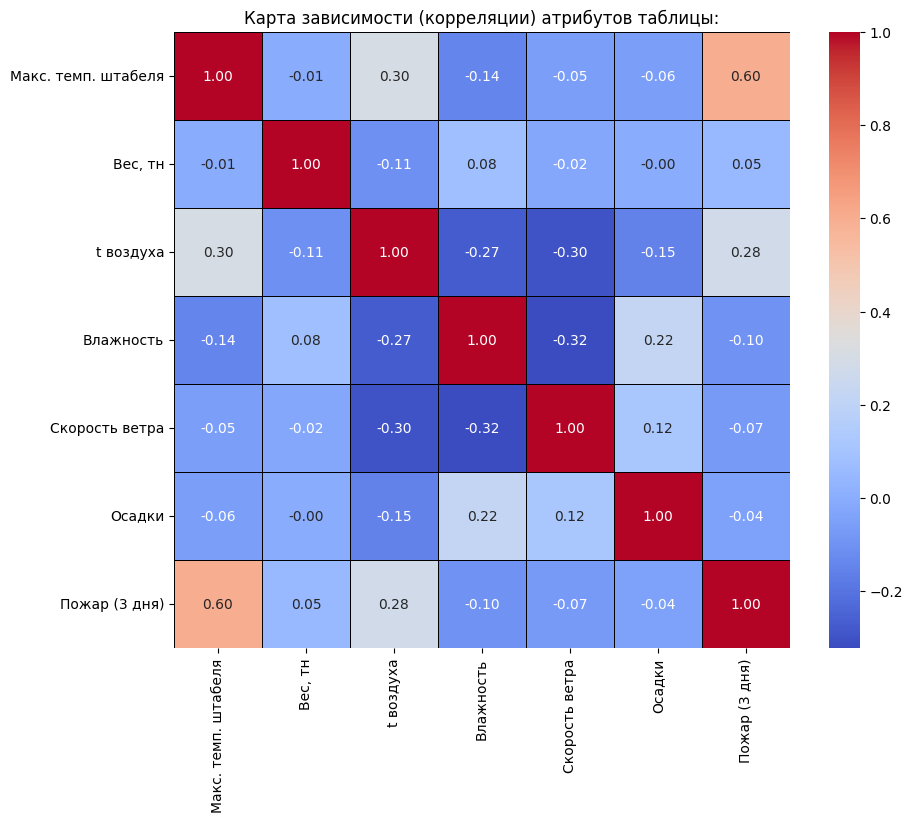

/tmp/ipython-input-1595765675.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




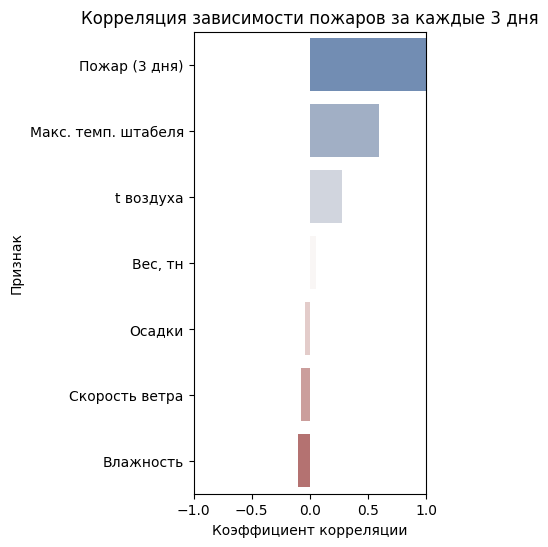

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt= ".2f",
    cmap= 'coolwarm',
    cbar=True,
    square=True,
    linewidths=.5,
    linecolor= 'black'
)
plt.title('Карта зависимости (корреляции) атрибутов таблицы:')
plt.show()

plt.figure(figsize=(3, 6))
sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    palette=  'vlag'
)
plt.title('Корреляция зависимости пожаров за каждые 3 дня')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признак')
plt.xlim(-1, 1)
plt.show()